In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
config_file     ="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model    ="frozen_inference_graph.pb"

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels =   []                                      #the list of the type of objects the pretrained model can detect
file_name='labels.txt'
with open(file_name,"rt") as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
model.setInputSize(520,520)            #frame size
model.setInputScale(1.0/127.5)         
model.setInputMean(127.5)
model.setInputSwapRB(True)

< cv2.dnn.Model 000002283E934650>

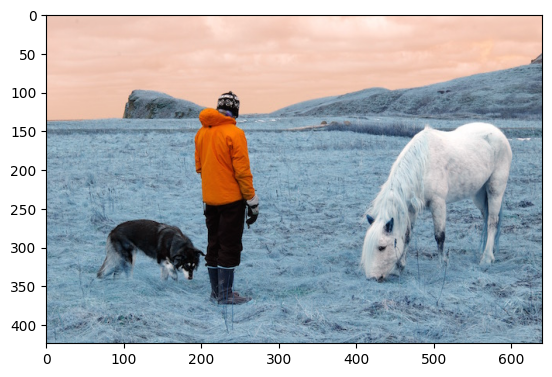

In [8]:
img =cv2.imread('person.jpg')
plt.imshow(img)

In [9]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.55)
print(classLabels[ClassIndex[0]-1])

sheep


In [10]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

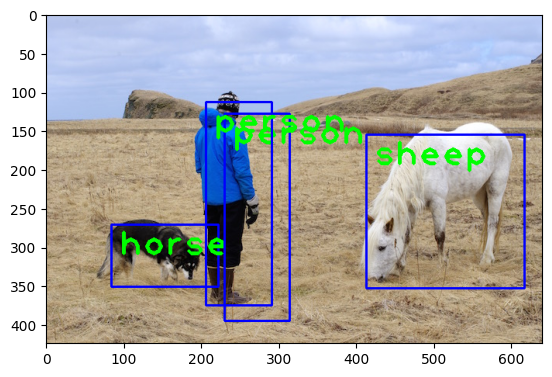

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
#DETECT OBJECTS IN A VIDEO
cap = cv2.VideoCapture('D:\\VIDEOS\\example_video.mp4')
if  not cap.isOpened():
    cap =  cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cant open the video')

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)


    if (len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence,bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

    cv2.imshow('object detection by Paul',frame)

    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [ ]:
#DETECT OBJECTS FROM WEBCAM
cap = cv2.VideoCapture(0)
if  not cap.isOpened():
    cap =  cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cant open the video')

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)


    if (len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence,bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

    cv2.imshow('object detection by Paul',frame)

    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 